# Twitter Classification Of Nepal Earthquake Tweets

<img src='tweet.gif' height="350" width="350">

## Introduction

Nepal earthquake of 2015, also called Gorkha earthquake, severe earthquake that struck near the city of Kathmandu in central Nepal on April 25, 2015. About 9,000 people were killed, many thousands more were injured, and more than 600,000 structures in Kathmandu and other nearby towns were either damaged or destroyed. The earthquake was felt throughout central and eastern Nepal, much of the Ganges River plain in northern India, and northwestern Bangladesh, as well as in the southern parts of the Plateau of Tibet and western Bhutan.

Microblogging sites like Twitter are increasingly being used for aiding relief operations during various mass emergencies.  A lot of critical situational information is posted on microblogging sites during disaster events. However, messages posted on microblogging sites often contain rumors and overstated facts. In such situations, identification of factual or fact-checkable tweets, i.e., tweets that report some relevant and verifiable fact (other than sympathy or prayer) is extremely important for effective coordination of post-disaster relief operations. Additionally, cross verification of such critical information is a practical necessity  and resource availability. Hence, automated Machine Learning  techniques are needed to identify the tweets that talk about the need of resources or availability of resources.

## Data Fields Explanation

The Twitter Classification Of Nepal Earthquake Tweets dataset consists of 18226 Tweet Entries. This Dataset consists of a Text data (Train.txt)(We need to convert it first into csv data (Tweets.csv)). The columns in the table are:

* TweetClass: Class of Tweet Type(Irrelevant,Need,Availability)
* TweetId: Unique Id
* Tweet: Text data of Tweets

## Class Description:

0: The tweet doesn’t talk about any resources needed or available (Irrelevant tweets)

1: The tweet mentions a resource that is needed (Need Tweets)

2: The tweet mentions a resource that is available (Availability tweets)

## Prerequisites

We would highly recommend that before the hack night you have some kind of toolchain and development environment already installed and ready. If you have no idea where to start with this, try a combination like:
* Python
* scikit-learn / sklearn
* Pandas
* NumPy
* Matplotlib
* Seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Convert Text file to Csv

In [2]:
import csv
txt_file = r"Train.txt"
csv_file = r"Tweets.csv"
    
in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')

out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

## Convert Csv into DataFrame

In [3]:
df = pd.read_csv('Tweets.csv',names=['data'])

In [4]:
df.head()

,data
0,"(0, '591764470197723137', '#Nepal #news Adding..."
1,"(0, '591779538046218240', ""The massacre of peo..."
2,"(0, '591728244925210624', ""I'm lonely, maybe y..."
3,"(0, '591774433926193152', '#nepal #news 6 bill..."
4,"(0, '591764472651386882', '#Nepal #news Indian..."


In [5]:
for col in df:
    df[col] =df[col].astype(str).str.replace("(","").str.replace(")","")

In [6]:
df.head()

,data
0,"0, '591764470197723137', '#Nepal #news Adding ..."
1,"0, '591779538046218240', ""The massacre of peop..."
2,"0, '591728244925210624', ""I'm lonely, maybe yo..."
3,"0, '591774433926193152', '#nepal #news 6 billi..."
4,"0, '591764472651386882', '#Nepal #news Indian ..."


## Split Data using Commas

In [7]:
df = df['data'].str.split(',', expand=True)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8
0,0,'591764470197723137','#Nepal #news Adding to Bhutanese Refugees Bh...,None,None,None,None,None,None
1,0,'591779538046218240',"""The massacre of people's movement says peace...",None,None,None,None,None,None
2,0,'591728244925210624',"""I'm lonely",maybe you're going to die without closing the...,"I'm going to die.""",None,None,None,None
3,0,'591774433926193152','#nepal #news 6 billion collection collection...,None,None,None,None,None,None
4,0,'591764472651386882','#Nepal #news Indian proposal to crash airpor...,None,None,None,None,None,None


* As We can see by seprating data using commas we accidently seprated it into 7 different data columns because some of our text lines also contain commas inside text. 

For Example:  "I'm lonely, maybe you're going to die without closing the city. Love will not leave you, I'm going to die."

* Now we need to add data of all the 7 columns to get our whole tweet text

In [9]:
df = df.fillna(value=" ")

In [10]:
df["texts"] = df[2].map(str)+df[3].map(str)+df[4].map(str)+df[5].map(str)+df[6].map(str)+df[7].map(str)+df[8].map(str)

In [11]:
df = df.drop(columns=[2,3,4,5,6,7,8],axis = 1)

In [12]:
df.head()

,0,1,texts
0,0,'591764470197723137','#Nepal #news Adding to Bhutanese Refugees Bh...
1,0,'591779538046218240',"""The massacre of people's movement says peace..."
2,0,'591728244925210624',"""I'm lonely maybe you're going to die without..."
3,0,'591774433926193152','#nepal #news 6 billion collection collection...
4,0,'591764472651386882','#Nepal #news Indian proposal to crash airpor...


In [13]:
df.columns = ['TweetClass','TweetId','Tweet'] 

In [14]:
df.head()

,TweetClass,TweetId,Tweet
0,0,'591764470197723137','#Nepal #news Adding to Bhutanese Refugees Bh...
1,0,'591779538046218240',"""The massacre of people's movement says peace..."
2,0,'591728244925210624',"""I'm lonely maybe you're going to die without..."
3,0,'591774433926193152','#nepal #news 6 billion collection collection...
4,0,'591764472651386882','#Nepal #news Indian proposal to crash airpor...


In [15]:
df.tail()

,TweetClass,TweetId,Tweet
18221,2,'592679798817816576','Kailash bakery providing free food to the ea...
18222,2,'592682158814339072','Nepal Earthquake Relief Surgical Material &a...
18223,2,'592684009563549696','Earthquake Nepal Indian Army takes up major ...
18224,2,'592683279188361217','National disaster helpline number made opera...
18225,2,'592694344655699968','Israel sends humanitarian aid to Nepal In th...


In [16]:
df.shape

(18226, 3)

In [17]:
df.describe()

,TweetClass,TweetId,Tweet
count,18226,18226,18226
unique,3,18226,17651
top,0,'592512196669640704',''
freq,17370,1,9


In [18]:
df['TweetClass'].value_counts()

0    17370
2      658
1      198
Name: TweetClass, dtype: int64

### Check For Duplication

In [19]:
df.duplicated().sum()

0

In [20]:
x = df.duplicated()
type(x)

pandas.core.series.Series

In [21]:
x.value_counts()

False    18226
dtype: int64

### Installing Missingno Package (For Graphical View of Missing Values)

In [22]:
!pip3 install missingno

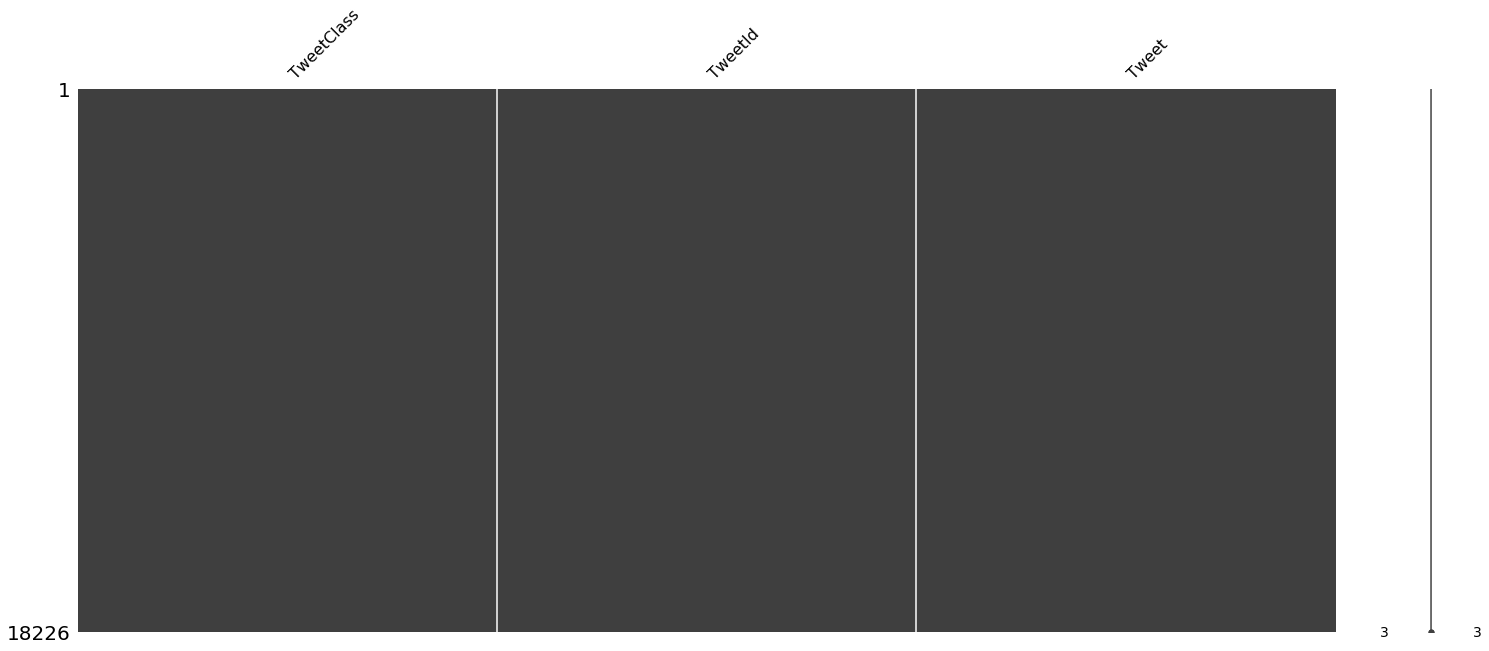

In [23]:
import missingno as msno
msno.matrix(df)

* <b>No missing value in the data.</b> 

In [24]:
df['TweetClass'].value_counts()

0    17370
2      658
1      198
Name: TweetClass, dtype: int64

### Mean Of Tweet Character Per Tweet

In [25]:
mean_df = (df.groupby('TweetClass')['Tweet'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_characters_per_tweet'))
print(mean_df)

  TweetClass  mean_characters_per_tweet
0          0                 100.570006
1          1                 107.686869
2          2                 111.778116


### Sum Of All Tweet Characters

In [26]:
sum_df = (df.groupby('TweetClass')['Tweet'].apply(lambda x: np.sum(x.str.len())).reset_index(name='sum_character_all_tweets'))
print(sum_df)

  TweetClass  sum_character_all_tweets
0          0                   1746901
1          1                     21322
2          2                     73550


### Sepration of Tweets into Different Class Dataframes

In [27]:
irrelevant_df = df[df['TweetClass'] == '0']

need_df = df[df['TweetClass'] == '1'] 

available_df = df[df['TweetClass'] == '2']

print("Irrelevent: ",irrelevant_df.shape)
print("Needs: ",need_df.shape)
print("Available: ",available_df.shape)

Irrelevent:  (17370, 3)
Needs:  (198, 3)
Available:  (658, 3)


In [28]:
irrelevant_df.head()

,TweetClass,TweetId,Tweet
0,0,'591764470197723137','#Nepal #news Adding to Bhutanese Refugees Bh...
1,0,'591779538046218240',"""The massacre of people's movement says peace..."
2,0,'591728244925210624',"""I'm lonely maybe you're going to die without..."
3,0,'591774433926193152','#nepal #news 6 billion collection collection...
4,0,'591764472651386882','#Nepal #news Indian proposal to crash airpor...


In [29]:
need_df.head()

,TweetClass,TweetId,Tweet
17370,1,'591922042481479680','Nepal seeks mobile medical assistance from I...
17371,1,'591979790627840000','Nepalis r w/o water &amp electricity Water i...
17372,1,'591985311665684480','The wounded and untimely families need to ta...
17373,1,'591989264256106499','they are in search of blood donors for the p...
17374,1,'591987020924260354','Walked all around central &amp old KTM.Shops...


In [30]:
available_df.head()

,TweetClass,TweetId,Tweet
17568,2,'591915875638325248','Indian Prime Minister Narendra Modi has anno...
17569,2,'591933551798419456','Phone from NTC does not take money when you ...
17570,2,'591939270673182721','India has sent 5 helicopters for relief and ...
17571,2,'591968116919410690','NDRF personnel relief material was sent to N...
17572,2,'591974898139987968','#SriLanka to fly emergency medical help food...


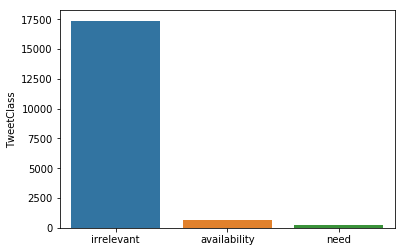

In [31]:
sns.barplot(x = ["irrelevant", 'availability','need'], y = df['TweetClass'].value_counts(), data=df)


* Unbalanced Data as no of irrelevant tweets are more the no of availability and no of need tweets

### Installing WordCloud Package

In [32]:
!pip3 install wordcloud

### What is Word Cloud

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

* We are going to remove Stopwords in our Data to analyze it better.

### What are StopWords

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

irrelevant_vect = CountVectorizer(stop_words='english')

need_vect = CountVectorizer(stop_words='english')

available_vect = CountVectorizer(stop_words='english')

irrelevant_dtm = irrelevant_vect.fit_transform(irrelevant_df['Tweet'])
need_dtm = need_vect.fit_transform(need_df['Tweet'])
available_dtm = available_vect.fit_transform(available_df['Tweet'])


In [34]:
irrelevant_word = irrelevant_vect.get_feature_names()
irrelevant_freqs = irrelevant_dtm.sum(axis=0).A1
irrelevant_result = dict(zip(irrelevant_word,irrelevant_freqs))
print(len(irrelevant_result))

16272


###  WordCloud using frequencies of words of Irrelevant Tweets.

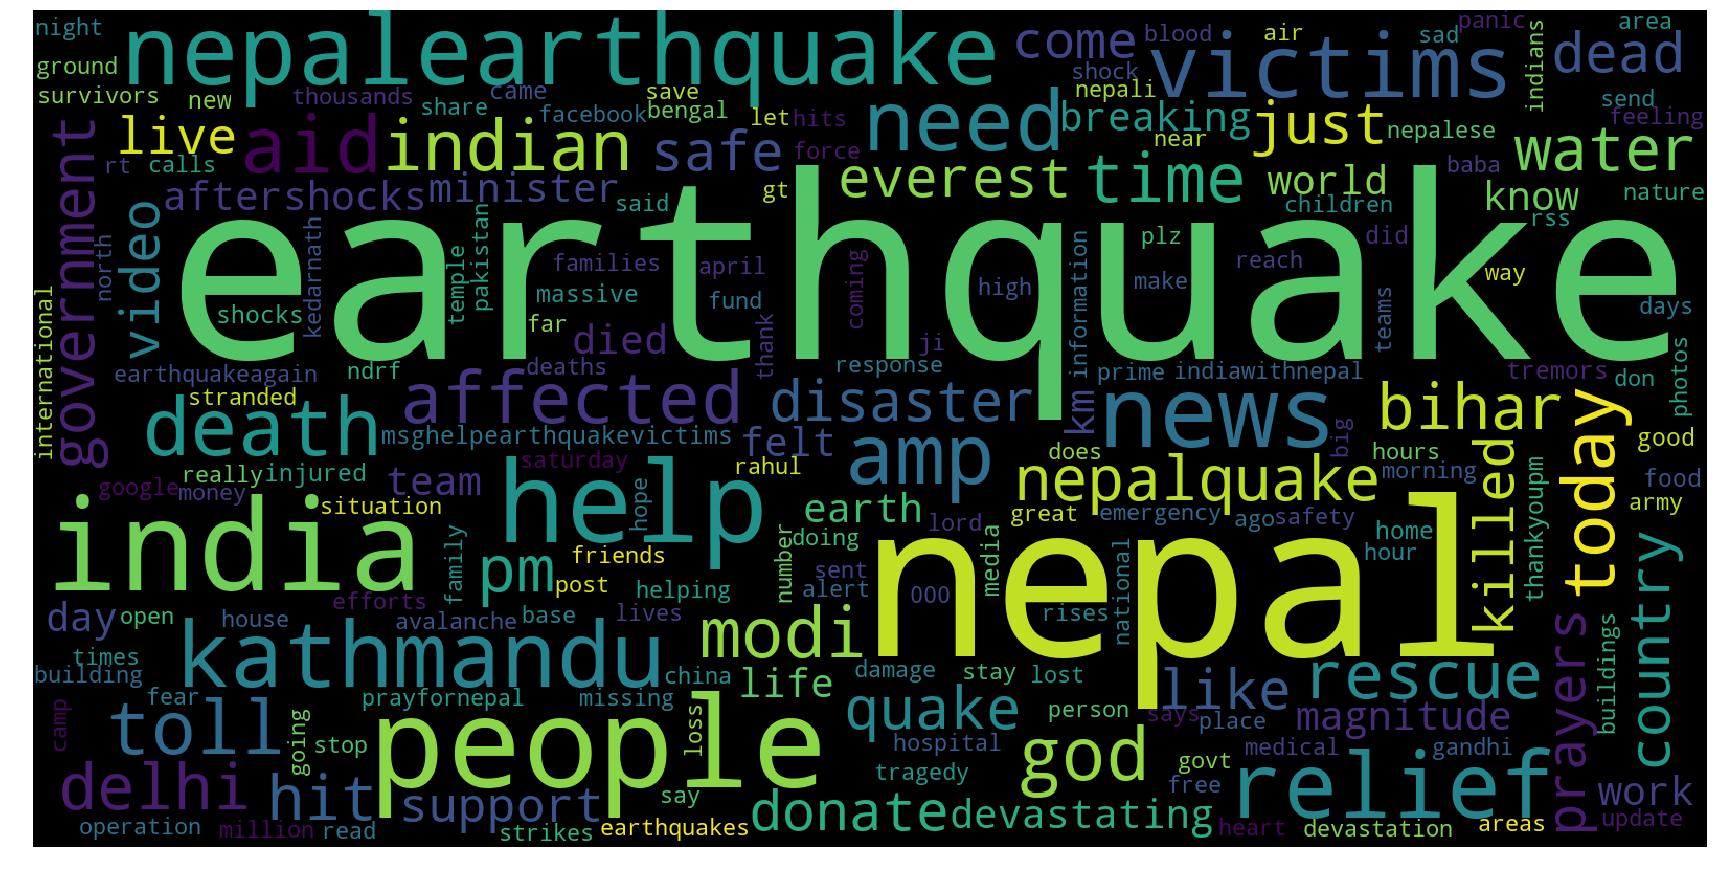

In [74]:
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(background_color='black',
                        width=1600,
                        height=800,
                      stopwords=STOPWORDS,
                    ).generate_from_frequencies(irrelevant_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("irrelevant_word_cloud.png")
plt.show()

The most used Words in Irrelevant Tweets are:

* indian
* affected
* modi
* victims
* delhi
* india

In [36]:
need_word = need_vect.get_feature_names()
need_freqs = need_dtm.sum(axis=0).A1
need_result = dict(zip(need_word,need_freqs))
print(len(need_word))

752


###  WordCloud using frequencies of words of Need Tweets.

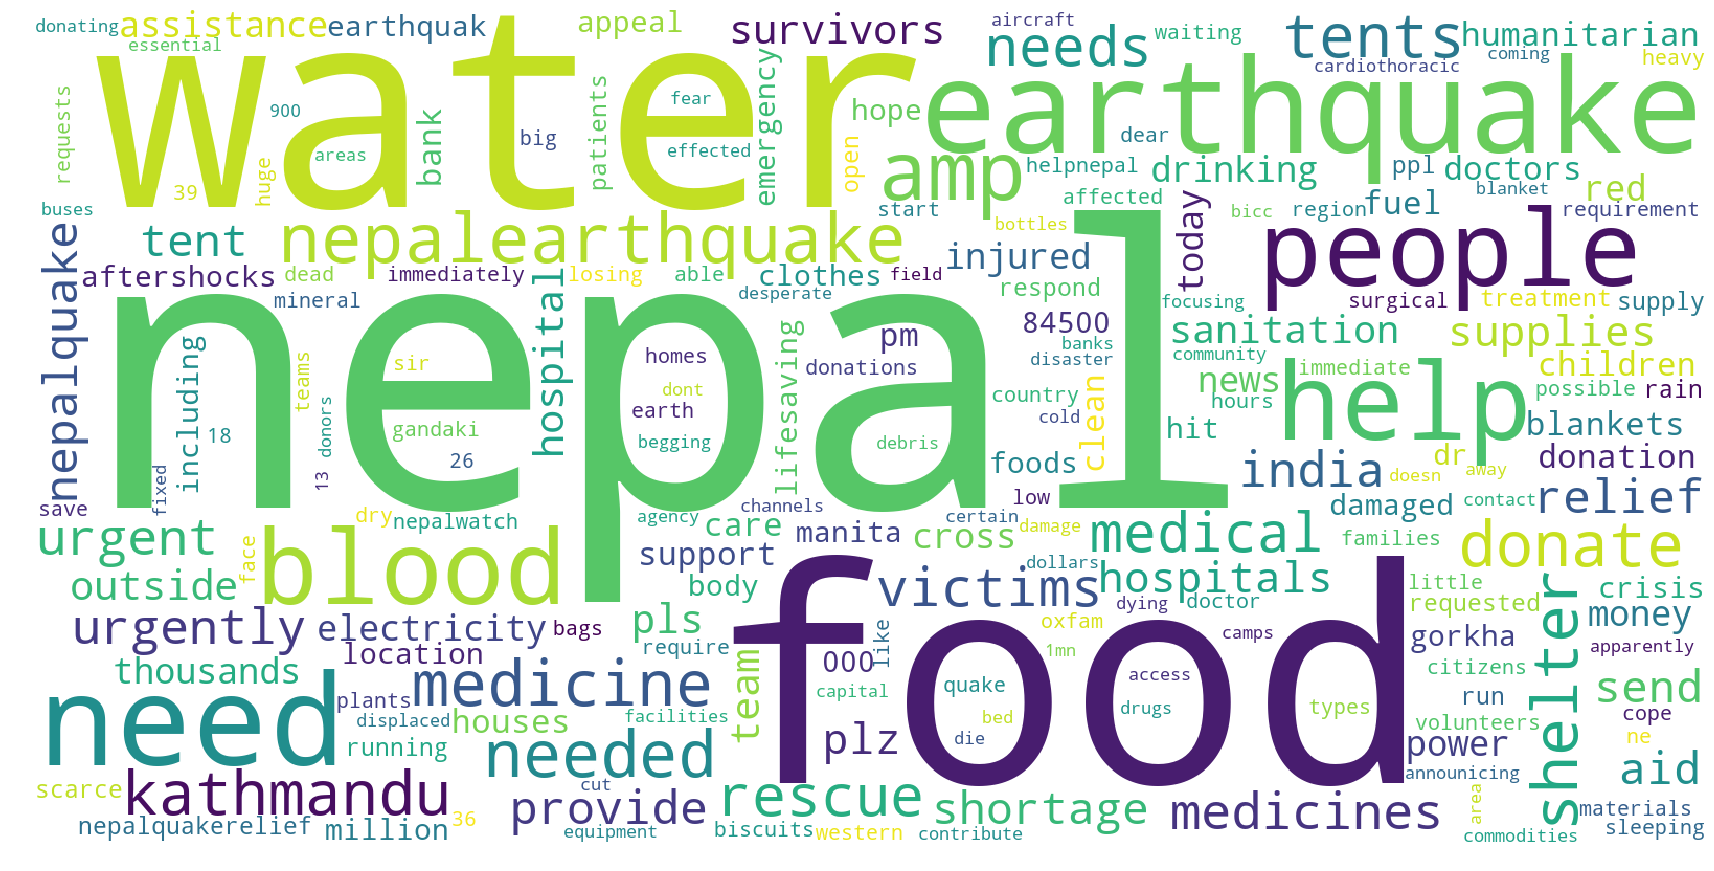

In [75]:
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(background_color='white',
                        width=1600,
                        height=800,
                      stopwords=STOPWORDS,
                    ).generate_from_frequencies(need_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("need_word_cloud.png")
plt.show()

The most used Words in Need Tweets are:

* hospital
* electricity
* nepal
* blood
* water
* medicines

In [38]:
available_word = available_vect.get_feature_names()
available_freqs = available_dtm.sum(axis=0).A1
available_result = dict(zip(available_word,available_freqs))
print(len(available_word))

1571


###  WordCloud using frequencies of words of Available Tweets.

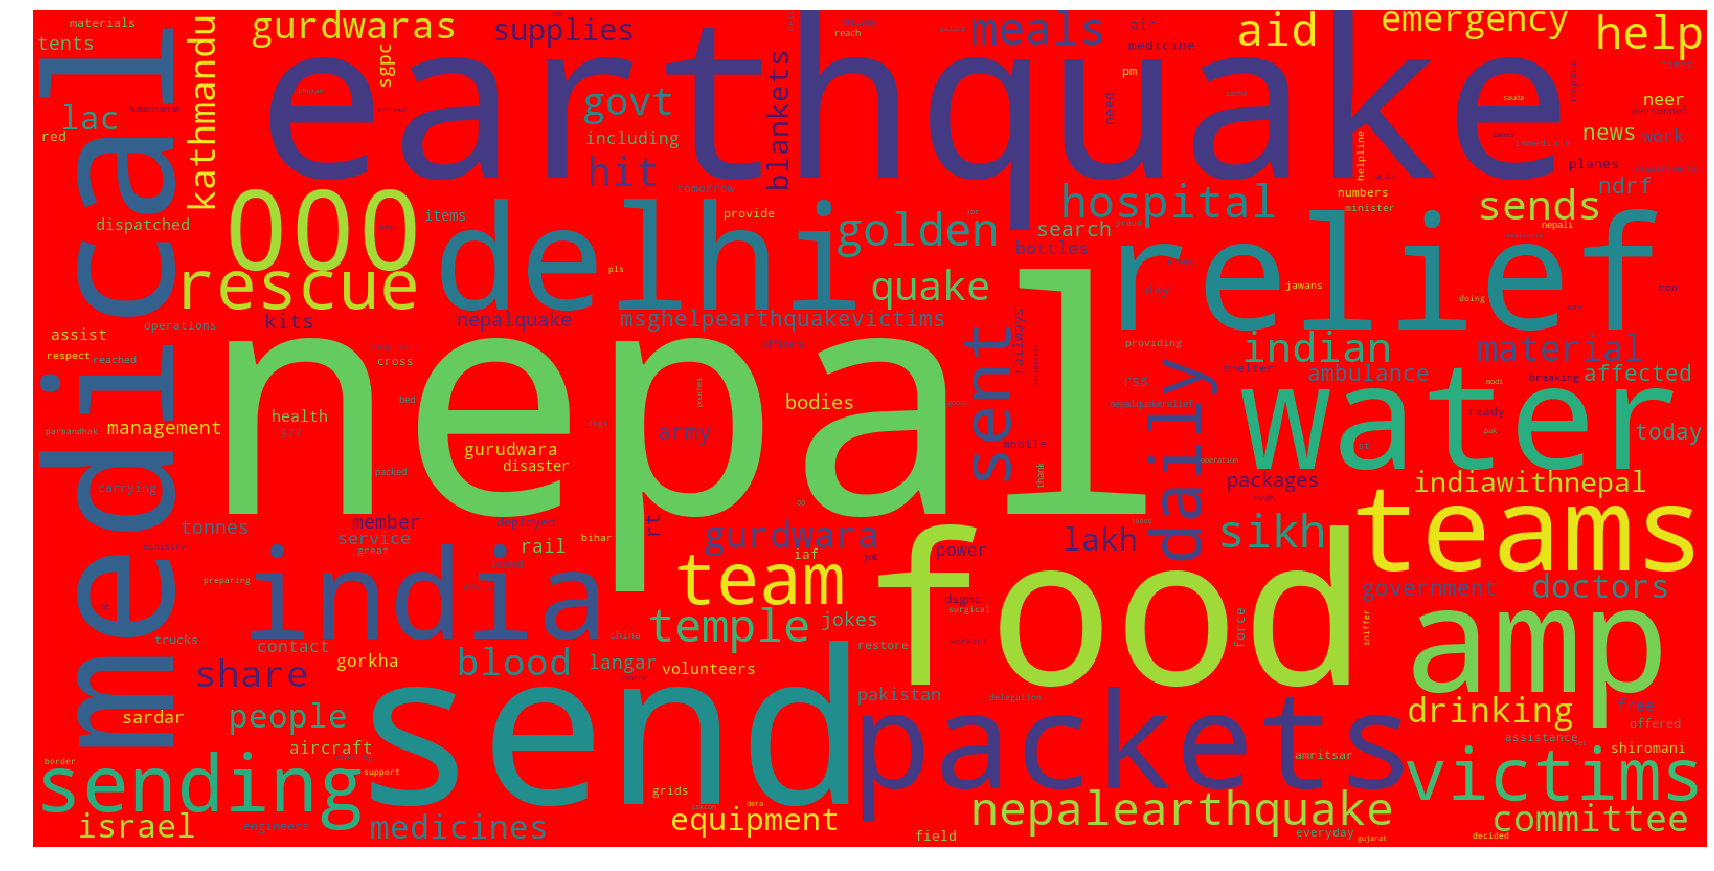

In [76]:
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(background_color='red',
                        width=1600,
                        height=800,
                      stopwords=STOPWORDS,
                    ).generate_from_frequencies(available_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("available_word_cloud.png")
plt.show()

The most used Words in Available Tweets are:

* blood
* supplies
* medical
* relief
* water
* packets

### Split Data into Independent(x) and Dependent(y) Variables

In [40]:
x = df['Tweet']
y = df['TweetClass']

### Using StratifiedShuffleSplit to Split Data

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds.

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(test_size=0.2, random_state=0)
sss.get_n_splits(x, y)
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

### Using TF-IDF Vectorizer to convert words into numeric

TF-IDF stands for “Term Frequency — Inverse Data Frequency”.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_train=TfidfVectorizer(lowercase=True)
new_x_train=vectorizer_train.fit_transform(x_train.values)
new_x_test=vectorizer_train.transform(x_test.values)

# Training Models

Till now, we have cleaned the data , graphically analyzed it. Now we will train model based upon our data.

### Models Trained below are :

* Logistic Regression
* Naive Bayes
* KNN (K Nearest Neighbor)
* SVM (Support Vector Machine) - linear
* SVM (Support Vector Machine) - rbf
* Decision Tree (gini)
* Random Forest (gini)

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(new_x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred1 = model1.predict(new_x_test)

In [45]:
from sklearn.metrics import confusion_matrix , f1_score
score1=f1_score(y_test,y_pred1, average='weighted')
print("F1 Score: ",score1)

F1 Score:  0.9606008796358692


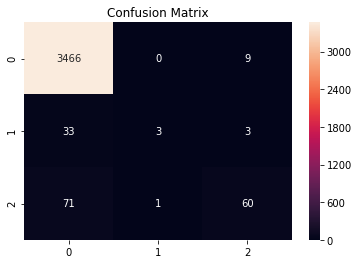

In [46]:
#ploting heatmap for confusion matrix
conf1 = confusion_matrix(y_test,y_pred1)
sns.heatmap(conf1, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(new_x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
y_pred2 = model2.predict(new_x_test)

In [49]:
from sklearn.metrics import confusion_matrix , f1_score
score2 = f1_score(y_test,y_pred2, average='weighted')
print("F1 Score: ",score2)

F1 Score:  0.9328645169036485


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


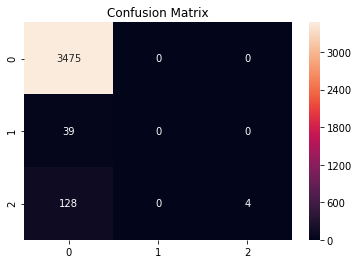

In [50]:
conf2 = confusion_matrix(y_test,y_pred2)
sns.heatmap(conf2, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## KNN (K Nearest Neighbor)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(new_x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
y_pred3 = model3.predict(new_x_test)

In [53]:
from sklearn.metrics import confusion_matrix , f1_score
score3 = f1_score(y_test,y_pred3, average='weighted')
print("F1 Score: ",score3)

F1 Score:  0.9536198581837695


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


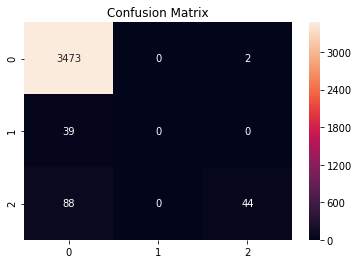

In [54]:
conf3 = confusion_matrix(y_test,y_pred3)
sns.heatmap(conf3, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## SVM (Support Vector Machine) - linear

In [55]:
from sklearn.svm import SVC
model4 = SVC(kernel='linear')
model4.fit(new_x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
y_pred4 = model4.predict(new_x_test)

In [57]:
from sklearn.metrics import confusion_matrix , f1_score
score4 = f1_score(y_test,y_pred4, average='weighted')
print("F1 Score: ",score4)

F1 Score:  0.9697199363144847


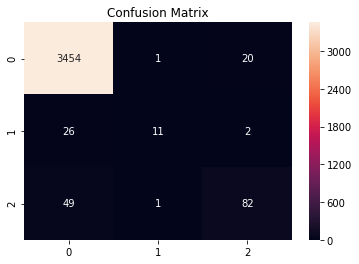

In [58]:
conf4 = confusion_matrix(y_test,y_pred4)
sns.heatmap(conf4, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## SVM (Support Vector Machine) - rbf

In [59]:
model5 = SVC(kernel='rbf')
model5.fit(new_x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
y_pred5 = model4.predict(new_x_test)

In [61]:
from sklearn.metrics import confusion_matrix , f1_score
score5 = f1_score(y_test,y_pred5, average='weighted')
print("F1 Score: ",score5)

F1 Score:  0.9697199363144847


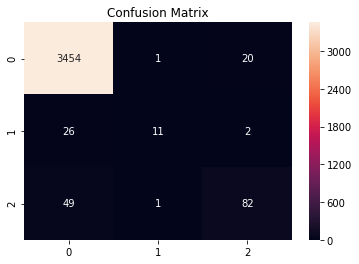

In [62]:
conf5 = confusion_matrix(y_test,y_pred5)
sns.heatmap(conf5, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Decision Tree (gini)

In [63]:
from sklearn.tree import DecisionTreeClassifier
model6 = DecisionTreeClassifier(criterion='gini')
model6.fit(new_x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
y_pred6 = model6.predict(new_x_test)

In [65]:
from sklearn.metrics import confusion_matrix , f1_score
score6 = f1_score(y_test,y_pred6, average='weighted')
print("F1 Score: ",score6)

F1 Score:  0.9602115441886848


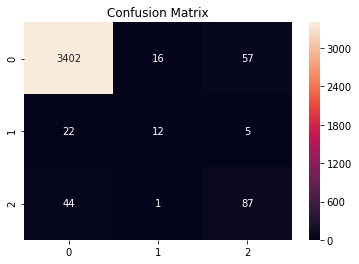

In [66]:
conf6 = confusion_matrix(y_test,y_pred6)
sns.heatmap(conf6, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Random Forest (gini)

In [67]:
from sklearn.ensemble import RandomForestClassifier
model7 = RandomForestClassifier(criterion='gini')
model7.fit(new_x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
y_pred7 = model7.predict(new_x_test)

In [69]:
from sklearn.metrics import confusion_matrix , f1_score
score7 = f1_score(y_test,y_pred7, average='weighted')
print("F1 Score: ",score7)

F1 Score:  0.9622306236397004


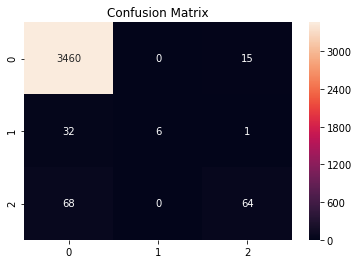

In [70]:
conf7 = confusion_matrix(y_test,y_pred7)
sns.heatmap(conf7, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Comparing Scores of All Trained Models

In [71]:
F1score = [score1,score2,score3,score4,score5,score6,score7]

data = {'F1score' : F1score,
        'Algorithm' : ['Logistic Regression',"Naive Bayes",'KNeighbors','SVM linear','SVM rbf',"Decision Tree(gini)",
                       'Random Forest(gini)']
       }

accuracy =pd.DataFrame(data)

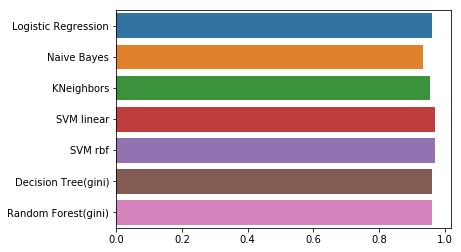

In [72]:
sns.barplot(x = data['F1score'], y = data['Algorithm'])

In [73]:
accuracy

,F1score,Algorithm
0,0.960601,Logistic Regression
1,0.932865,Naive Bayes
2,0.953620,KNeighbors
3,0.969720,SVM linear
4,0.969720,SVM rbf
5,0.960212,Decision Tree(gini)
6,0.962231,Random Forest(gini)


* The Best Accuracy we got is of SVM in both linear and rbf. Although other model are approximately equal to that.